In [1]:
# read data
import numpy as np
import pandas as pd
from collections import defaultdict
import re
import string 

print ("Reading data...")
text_file = open("crime.txt", "r")
lines = [i for i in text_file.readlines()]
data = list(lines)[1:]
print(len(data))
print data[:4]
print data[0][3]
print ("done")
                  

Reading data...
60164
['"SAN DIEGO","GRAND THEFT FROM PERSON",1/3/2018 16:30:00,"7800  BLOCK STALMER STREET","92111","SAN DIEGO"\r\n', '"HARBOR POLICE","SELL LIQUOR TO MINOR (M)",9/23/2017 18:28:00,"3200  BLOCK NORTH HARBOR DRIVE","92101","SAN DIEGO"\r\n', '"HARBOR POLICE","DRUNK IN PUBLIC: ALCOHOL, DRUGS, COMBO OR TOLUENE (M)",10/6/2017 8:48:00,"600  BLOCK CONVENTION WAY","92101","SAN DIEGO"\r\n', '"HARBOR POLICE","DRUNK IN PUBLIC: ALCOHOL, DRUGS, COMBO OR TOLUENE (M)",10/11/2017 19:45:00,"3600  BLOCK NORTH HARBOR DRIVE","92101","SAN DIEGO"\r\n']
N
done


In [2]:
print(data[2])

"HARBOR POLICE","DRUNK IN PUBLIC: ALCOHOL, DRUGS, COMBO OR TOLUENE (M)",10/6/2017 8:48:00,"600  BLOCK CONVENTION WAY","92101","SAN DIEGO"



In [3]:
''' This is a test of regular expression
import re
for i in res:
    print(i)
    match = re.search('\d{1,2}\/\d{1,2}\/\d{4} \d{1,2}\:\d{1,2}\:\d{1,2}', i)
    #match = re.search('(\d{5})', i)
    #match = re.search('\d{2}\/\d{1}\/\d{4} \d{1}\:\d{2}\:\d{2}',i)
    if(match):
        print("match!: ", i)
    else:
        print("no: ", i)
'''

' This is a test of regular expression\nimport re\nfor i in res:\n    print(i)\n    match = re.search(\'\\d{1,2}\\/\\d{1,2}\\/\\d{4} \\d{1,2}\\:\\d{1,2}\\:\\d{1,2}\', i)\n    #match = re.search(\'(\\d{5})\', i)\n    #match = re.search(\'\\d{2}\\/\\d{1}\\/\\d{4} \\d{1}\\:\\d{2}\\:\\d{2}\',i)\n    if(match):\n        print("match!: ", i)\n    else:\n        print("no: ", i)\n'

In [4]:
# hashtable like '92118': 8
# zipcode_crime_time is a dict : {'92092':'[list of times]'}
zipcode_CrimeNum = defaultdict(int)
zipcode_CrimeTime = defaultdict(list)
word_Frequency = defaultdict(int)
# crimes are likely to happen on which days in a month
day_CrimeNum = defaultdict(int)
# crimes are likely to happen on which months
month_CrimeNum = defaultdict(int)
# crimes are likely to happen on which section of a day
daytime_CrimeNum = defaultdict(int)
zipp = []
for d in data:
#     zipcode_numofcrime
    ele = d.split("\",\"")
    zipcode = ele[2]
    if (len(zipcode) != 5) or (zipcode[0] != '9'):
        continue
    zipcode_CrimeNum[zipcode] += 1
    if zipcode not in zipp:
        zipp.append(zipcode)
    
#     zipcode_CrimeTime
    crime_time = ""
    res = d.split(",")
    for crime_str in res:
        match = re.search('\d{1,2}\/\d{1,2}\/\d{4} \d{1,2}\:\d{1,2}\:\d{1,2}', crime_str)
        if(match):
            crime_time = crime_str
    zipcode_CrimeTime[zipcode] += [crime_time] 
    
#     word_frequency
    item = d.split("\",")
    description = item[1][1:]
    #     not a punctuation
    punctuation = set(string.punctuation)
    r = ''.join([c for c in description.lower() if not c in punctuation])
    for w in r.split():
        word_Frequency[w] += 1
        
# !!! Need Pie Charts        
# crimes are likely to happen on which months
    month = crime_time.split('/')[0]
    month_CrimeNum[month] += 1
        
# !!! Need Pie Charts        
# crimes are likely to happen on which days in a month
    day = crime_time.split('/')[1]
    day_CrimeNum[day] += 1
    
# !!! Need Pie Charts    
# crimes are likely to happen on which section of a day
    time =  crime_time.split()[1]
    hour = int(time.split(':')[0])
    if 0<= hour < 16:
        keyhour = 'night'
    elif 6 <= hour < 12:
        keyhour = 'morning'
    elif 12 <= hour < 18:
        keyhour = 'afternoon'
    else:
        keyhour = 'evening'
    daytime_CrimeNum[keyhour] += 1
        
        

# print  daytime_CrimeNum   
# print day_CrimeNum   
# print month_CrimeNum
    

        
# count is a list of tuples like (12920, 'theft')
counts = [(word_Frequency[w], w) for w in word_Frequency if len(w)> 1]
counts = sorted(counts, key = lambda x: x[0], reverse = True)
# print counts

# print zipcode_CrimeNum

#print counts

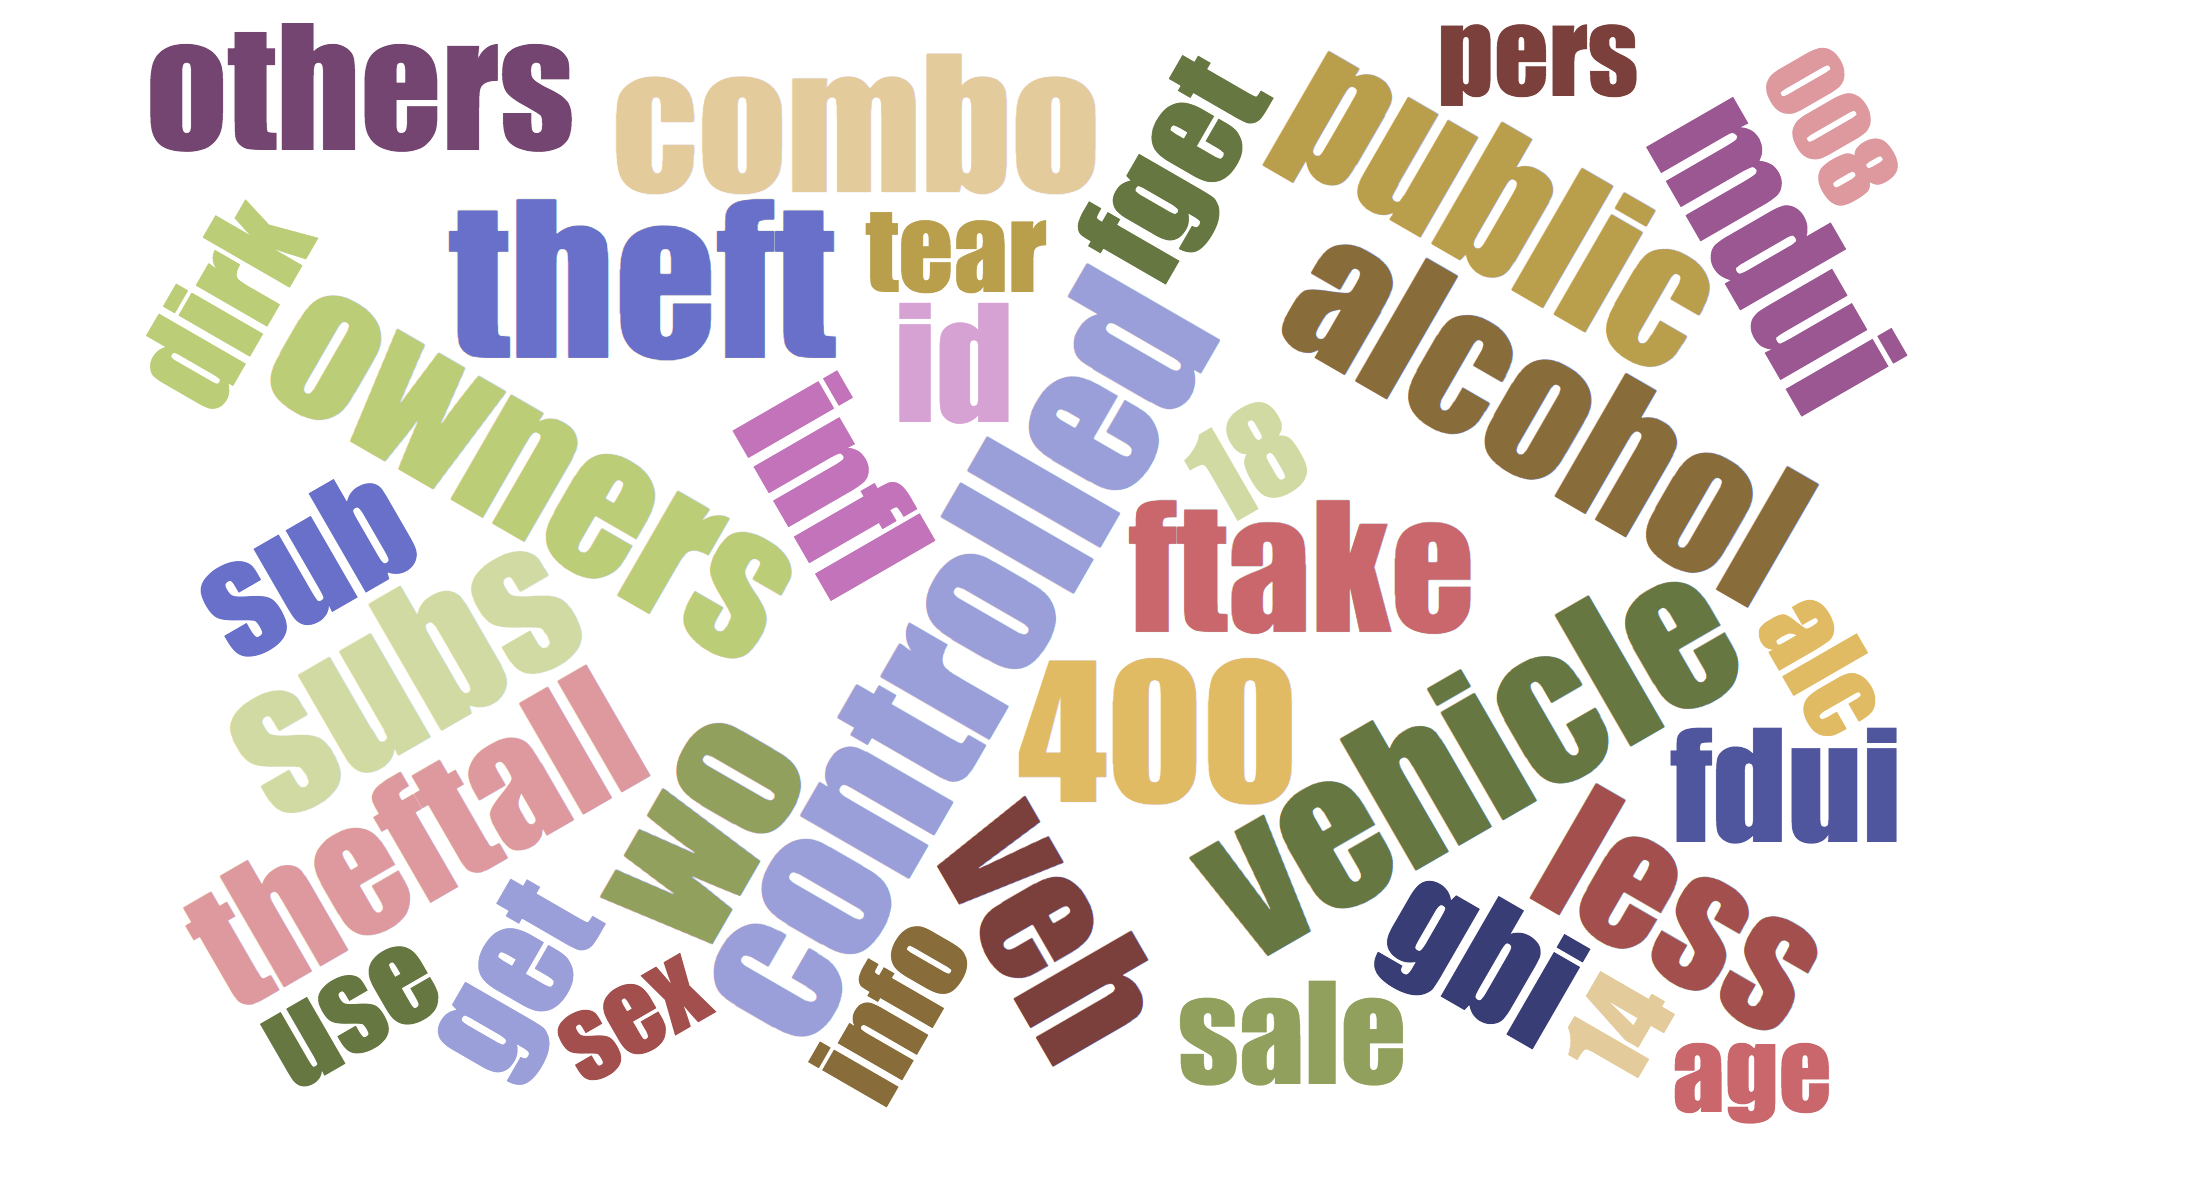

In [5]:
from IPython.display import Image
Image("word frequency.png")

In [6]:
print(len(zipcode_CrimeTime))
print(len(zipcode_CrimeNum))
print(zipp)

139
139
['92111', '92101', '92110', '92104', '92117', '92054', '92115', '92102', '92020', '91932', '92120', '92105', '92106', '92107', '92130', '92078', '91977', '92083', '92114', '92124', '92021', '91910', '92118', '92121', '91945', '92040', '91902', '92064', '92103', '92007', '92024', '92071', '92029', '92154', '92028', '92113', '91941', '92129', '92108', '92131', '92084', '92069', '92019', '92065', '92136', '92025', '91978', '92003', '92055', '92173', '92082', '92027', '91901', '92026', '92056', '92081', '92057', '92058', '92182', '92119', '91915', '92132', '92059', '92036', '92109', '91942', '92014', '92127', '92139', '92126', '91935', '92116', '91906', '91911', '92100', '91962', '92128', '92123', '92075', '92037', '92008', '91950', '92009', '92122', '92011', '95928', '91913', '92004', '92010', '92067', '95050', '91914', '91980', '92061', '92070', '92086', '91916', '92052', '92091', '92140', '91917', '92093', '91905', '92536', '92804', '92060', '91934', '92672', '92158', '92161', '

In [7]:
# zipcode_CrimeTime['92101'] # this will print out all recorded crimes in zipcode 92101

In [14]:
from uszipcode import ZipcodeSearchEngine
search = ZipcodeSearchEngine()
xys = []
for i in zipp:
    zipcode123 = search.by_zipcode(i)
    
    if not zipcode123['Latitude']:
        print("Due to uszipcode module outdate defect, cannot find zipcode: ", i)
        continue
    mem = (zipcode123['Latitude'], zipcode123['Longitude'])
    if zipcode_CrimeNum[i] == 1:
        print("only one crime: ", i)
    print(zipcode_CrimeNum[i])
    for k in range(zipcode_CrimeNum[i]):
        if k >= 1000:
            break
        xys.append(mem)
print(len(xys))

779
3963
1279
987
607
1892
1428
816
1579
587
419
1240
374
586
348
534
979
864
756
281
1332
1781
227
194
706
703
135
547
1026
204
931
1132
430
1135
608
1121
486
318
1320
271
839
848
525
375
('Due to uszipcode module outdate defect, cannot find zipcode: ', '92136')
1627
95
66
19
531
395
804
411
645
936
589
743
625
('Due to uszipcode module outdate defect, cannot find zipcode: ', '92182')
249
248
('Due to uszipcode module outdate defect, cannot find zipcode: ', '92132')
71
20
1910
1141
214
259
333
650
71
549
34
1645
('Due to uszipcode module outdate defect, cannot find zipcode: ', '92100')
26
359
587
173
536
1099
1382
390
549
385
('only one crime: ', '95928')
1
337
18
289
('Due to uszipcode module outdate defect, cannot find zipcode: ', '92067')
('only one crime: ', '95050')
1
119
9
32
13
5
9
('Due to uszipcode module outdate defect, cannot find zipcode: ', '92052')
6
('Due to uszipcode module outdate defect, cannot find zipcode: ', '92140')
7
('Due to uszipcode module outdate defect, can

In [15]:
for tuple_pair in xys:
    assert tuple_pair and isinstance(tuple_pair, tuple)
    assert tuple_pair[0]
    assert isinstance(tuple_pair[0], float)
    assert tuple_pair[1]
    assert isinstance(tuple_pair[1], float)

In [16]:
from gmplot import gmplot

# Place map
gmap = gmplot.GoogleMapPlotter(32.7269669, -117.1647094, 13)

# Polygon
# golden_gate_park_lats, golden_gate_park_lons = zip(*[
#     (37.771269, -122.511015),
#     (37.773495, -122.464830),
#     (37.774797, -122.454538),
#     (37.771988, -122.454018),
#     (37.773646, -122.440979),
#     (37.772742, -122.440797),
#     (37.771096, -122.453889),
#     (37.768669, -122.453518),
#     (37.766227, -122.460213),
#     (37.764028, -122.510347),
#     (37.771269, -122.511015)
#     ])
# gmap.plot(golden_gate_park_lats, golden_gate_park_lons, 'cornflowerblue', edge_width=10)

# Scatter points
top_attraction_lats, top_attraction_lons= zip(*xys)
gmap.scatter(top_attraction_lats, top_attraction_lons, '#3B0B39', size=40, marker=False)

# Marker
hidden_gem_lat, hidden_gem_lon = 32.7269669, -117.1647094
gmap.marker(hidden_gem_lat, hidden_gem_lon, color = 'cornflowerblue')

#heatmap
# def heatmap(self, lats, lngs, threshold=10, radius=10, gradient=None, opacity=0.6, maxIntensity=None, dissipating=True):
#         """
#         :param lats: list of latitudes
#         :param lngs: list of longitudes
#         :param maxIntensity:(int) max frequency to use when plotting. Default (None) uses max value on map domain.
#         :param threshold:
#         :param radius: The hardest param. Example (string):

gmap.heatmap(top_attraction_lats, top_attraction_lons, threshold=20, radius=150, gradient=None, opacity=0.3, maxIntensity=1000, dissipating=True)
#gmap.heatmap(top_attraction_lats, top_attraction_lons, maxIntensity = 0)
# Draw
gmap.draw("my_map.html")
